# Football Market Value Analysis

---

Author : Ayudha Amari Hirtranusi  

  
Objective : This project is meant to be a demonstration on different types of analysis that can be done with Football Statistics from Transfermarkt. This project will include problem statement, data loading, data cleaning, data analysis, and conclusion.  

Dashboard visualization : [Link](https://public.tableau.com/app/profile/ayudha.amari.hirtranusi/viz/h8dsft_Milestone1_Ayudha_Amari/home-page)  
Dataset : [Link](https://www.kaggle.com/datasets/davidcariboo/player-scores/data)

---

## Problem Identification
In this project, we will define the problem statement and it's goals using SMART framework, then we will analyzed it further by breaking down the problem into question.

**Topic** : Football
### Background
A football club is facing financial difficulties, characterized by significant debt. To recover their financial standing, the head appointed a Data Analyst. Therefore, the Data Analyst need to identify the factors that can enhance the player's market value and increase the club's market value, thereby improving the club's financial situation.

**Problem statement**  
"The football club is facing financials difficulties (trying to recover from debt). The goal is to increase the overall market value of players by 15% within the upcoming season by analyzing and optimizing player performance metrics and market value determinants."

### Breaking Down The Problem
Main problem: Improving player and club market value as metrics of financial recovery.

-  Football player:
1. Who are the players with the highest market value right now?
2. Do players with specific physical attributes command higher market values?
3. What factors contribute most to a player's market value (age, position, performance metrics)?
4. Where are the players with the highest market values from (country)?
5. Why do some players have a higher market value despite similar performance metrics (goals, assists, minutes played)?
6. How can training and development programs be optimized to improve players market value?

- League:
1. Which league contribute to highest market value right now?

- Team :  
1. Which club has the highest market value right now?

First, we have to import all the libraries needed

In [1]:
# Import Library
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

## Data Loading
Data Source :   
**A. Dataset** : [link dataset kaggle](https://www.kaggle.com/datasets/davidcariboo/player-scores/data)  
**B. Description** :  
This is a real football (Soccer) data that are scraped from [Transfermarkt website](https://www.transfermarkt.com/) and dataset with the link above is updated every week. Transfermarkt itself is one of the most famous football's website that  provides an article about football transfers, rumors, market values, competition and statistics. In short, it is a football portal with transfers, market values, rumours and statistics. 

First, we need to load the data needed for our analysis. In this case, there are three csv files we needed since we focuses on player aspect. The three files we will be needed are appearances of the players, the players data, and games itself. That are, `appearances.csv`, `players.csv`, and `games.csv`

In [2]:
# Load CSV into dataframes
appearances = pd.read_csv("appearances.csv")
players = pd.read_csv("players.csv")
games = pd.read_csv("games.csv")

Now, let's see what each csv files df about as follows

``` SQL
-- This is the query examples if you want to load it from SQL for each df
SELECT * FROM PLAYERS; 
SELECT * FROM APPEARANCES;
SELECT * FROM GAMES;
```

In [3]:
# Printing out players df
players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,SS Lazio,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,PAOK Thessaloniki,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus FC,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,Bayern Munich,100000.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31568,1264305,Sjors-Lowis,Hermsen,Sjors-Lowis Hermsen,2023,385,sjors-lowis-hermsen,NaN,NaN,Netherlands,...,NaN,175.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sjors-lowis-he...,NL1,Fortuna Sittard,NaN,NaN
31569,1266282,Yaroslav,Shevchenko,Yaroslav Shevchenko,2023,3592,yaroslav-shevchenko,NaN,"Kremenchuk, Poltava Oblast",Ukraine,...,right,181.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yaroslav-shevc...,UKR1,Kryvbas Kryvyi Rig,NaN,NaN
31570,1268326,Tymur,Butenko,Tymur Butenko,2023,3592,tymur-butenko,Ukraine,Dnipropetrovsk,Ukraine,...,right,174.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tymur-butenko/...,UKR1,Kryvbas Kryvyi Rig,NaN,NaN
31571,1268378,Adnan Efe,Durmuşoğlu,Adnan Efe Durmuşoğlu,2023,6646,adnan-efe-durmusoglu,NaN,NaN,Türkiye,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/adnan-efe-durm...,TR1,Fatih Karagümrük,NaN,NaN


The players dataframe contains the biodata of each players, imagine like each row representing each players

In [4]:
# Printing out appearances df
appearances

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589863,4346131_720287,4346131,720287,2741,2741,2024-06-02,Danila Kozlov,RUP,0,0,0,1,87
1589864,4346131_814269,4346131,814269,964,964,2024-06-02,Gustavo Mantuan,RUP,0,0,0,0,45
1589865,4346131_815346,4346131,815346,2741,2741,2024-06-02,Nathan Gassama,RUP,0,0,0,0,19
1589866,4346131_84483,4346131,84483,964,964,2024-06-02,Aleksandr Erokhin,RUP,1,0,0,0,26


The appearances dataframe is like the root dataframe of all the dataframe used, this dataframe contains **one row per player appearance**, i.e. one row per player per game played. For each appearance you will find attributes such as goals, assists or yellow_cards and IDs referencing other entities within the dataset, such as player_id and game_id.

In [5]:
# Printing out games df
games

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt,0:2,domestic_league
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,...,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league
3,2321152,L1,2013,11. Matchday,2013-11-02,44,33,0,2,7.0,...,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league
4,2321205,L1,2013,17. Matchday,2013-12-21,41,39,2,3,14.0,...,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1.FSV Mainz 05,2:3,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68459,2629035,NLP,2015,Third Round,2015-10-27,383,16866,6,0,NaN,...,Philips Stadion,31000.0,Allard Lindhout,https://www.transfermarkt.co.uk/spielbericht/i...,4-3-3 Attacking,4-4-2,PSV Eindhoven,NaN,6:0,domestic_cup
68460,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,NaN,...,Philips Stadion,34200.0,Anthony Taylor,https://www.transfermarkt.co.uk/spielbericht/i...,4-3-3 Defending,4-5-1,PSV Eindhoven,NaN,3:0,international_cup
68461,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,...,bet365 Stadium,9410.0,Michael Salisbury,https://www.transfermarkt.co.uk/spielbericht/i...,4-2-3-1,4-2-3-1,Stoke City,NaN,6:1,other
68462,3143618,FAC,2018,Third Round Replay,2019-01-15,512,3054,2,3,NaN,...,bet365 Stadium,10261.0,Geoff Eltringham,https://www.transfermarkt.co.uk/spielbericht/i...,4-4-2 Diamond,4-2-3-1,Stoke City,NaN,2:3,domestic_cup


The games dataframe contains the game information, like which competition league the games played on, which stadiums, and so on. The information we needed from this dataframe is only the `season` columns because we want to get information about the stats of a player in particular season

## Data Preparation

### - Data Merging

Now, we will merge those three dataframes into full dataframe which we will be call `full_players_info` dataframe, imagine like you are combining three different tables in SQL with join operation where the appearances table is the root tables that has primary key and foreign key of other tables (players and games tables)

In [6]:
# Merge appearances,players, and games dataframes
full_players_info = players.merge(appearances, on='player_id')
full_players_info = full_players_info.merge(games[['game_id','season']], on='game_id') # Combining games dataframe but we only took the season columns from it (those are the only information we needed)

# Since our focus mainly on market value of the players, we will sort the dataframe for players with highest market value first go get better sense of it
full_players_info = full_players_info.sort_values(by='market_value_in_eur', ascending=False)

Now, lets see how our datafram looks like after the merging of three dataframe 

In [7]:
# Display our dataframe after the merging of three dataframe
full_players_info

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,season
1523724,581678,Jude,Bellingham,Jude Bellingham,2023,418,jude-bellingham,England,Stourbridge,England,...,418,2020-10-28,Jude Bellingham,CL,0,0,0,1,6,2020
1523760,581678,Jude,Bellingham,Jude Bellingham,2023,418,jude-bellingham,England,Stourbridge,England,...,418,2021-05-13,Jude Bellingham,DFB,1,0,0,0,45,2020
1523762,581678,Jude,Bellingham,Jude Bellingham,2023,418,jude-bellingham,England,Stourbridge,England,...,418,2021-05-22,Jude Bellingham,L1,0,0,0,0,45,2020
1523763,581678,Jude,Bellingham,Jude Bellingham,2023,418,jude-bellingham,England,Stourbridge,England,...,418,2021-08-07,Jude Bellingham,DFB,0,0,0,0,55,2021
1523764,581678,Jude,Bellingham,Jude Bellingham,2023,418,jude-bellingham,England,Stourbridge,England,...,418,2021-08-14,Jude Bellingham,L1,0,0,0,0,73,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589857,1262720,Ahmet Mert,Koşar,Ahmet Mert Koşar,2023,3209,ahmet-mert-kosar,Türkiye,Istanbul,Türkiye,...,3209,2024-05-26,Ahmet Mert Koşar,TR1,0,0,0,0,1,2023
1589858,1264192,Bünyamin,Çetinkaya,Bünyamin Çetinkaya,2023,10484,bunyamin-cetinkaya,Türkiye,Istanbul,Türkiye,...,10484,2024-05-12,Bünyamin Çetinkaya,TR1,0,0,0,0,1,2023
1589859,1264305,Sjors-Lowis,Hermsen,Sjors-Lowis Hermsen,2023,385,sjors-lowis-hermsen,NaN,NaN,Netherlands,...,385,2024-05-19,Sjors-Lowis Hermsen,NL1,0,0,0,0,1,2023
1589860,1266282,Yaroslav,Shevchenko,Yaroslav Shevchenko,2023,3592,yaroslav-shevchenko,NaN,"Kremenchuk, Poltava Oblast",Ukraine,...,3592,2024-05-18,Yaroslav Shevchenko,UKR1,0,0,0,0,15,2023


Here, our central dataframe shows how appearances dataframe looks like but without the foreign key from other dataframes, now, players and games shows the player biodata and the season of the appearances (games played) instead. We will process this later on to suits what we needed.

### - Data Understanding

After we merged our dataframe, we need to understand how our central dataframes looks like, which are the columns we needed, which values we only cares about and so on. To do that, we can get a better understanding of data like seeing the summary of our data, seeing our columns attribute, the shape, the value we need, and so on.

In [8]:
# See our central dataframe shape
full_players_info.shape

(1589862, 36)

Our central dataframe contains of 36 columns with 1,589,862 of rows. That's a very large number of rows because our main dataframe still showing **one row per player appearance** from season 2012 until now. Well, since we are only focusing for current market player's value, we will be focusing for season 23/24 appearances only (this seasons shows the latest performance of the player), this steps then will be part of our cleaning process later on.

In [9]:
# See the description of our central dataframe
full_players_info.describe()

,player_id,last_season,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur,game_id,player_club_id,player_current_club_id,yellow_cards,red_cards,goals,assists,minutes_played,season
count,1.589862e+06,1.589862e+06,1.589862e+06,1.573270e+06,1.589258e+06,1.589258e+06,1.589862e+06,1.589862e+06,1.589862e+06,1.589862e+06,1.589862e+06,1.589862e+06,1.589862e+06,1.589862e+06,1.589862e+06
mean,1.919876e+05,2.020752e+03,3.678695e+03,1.821250e+02,4.415725e+06,1.201031e+07,3.075799e+06,3.027697e+03,3.678695e+03,1.481393e-01,3.799701e-03,9.611400e-02,7.569714e-02,6.936866e+01,2.017589e+03
std,1.767535e+05,2.928273e+00,9.385614e+03,6.618098e+00,1.174711e+07,1.947776e+07,5.961859e+05,7.721436e+03,9.385614e+03,3.664995e-01,6.152451e-02,3.313573e-01,2.860349e-01,2.989155e+01,3.488009e+00
min,1.000000e+01,2.012000e+03,3.000000e+00,1.700000e+01,1.000000e+04,1.000000e+04,2.211607e+06,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.012000e+03
25%,5.635400e+04,2.019000e+03,3.380000e+02,1.780000e+02,2.500000e+05,1.500000e+06,2.578180e+06,2.890000e+02,3.380000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.600000e+01,2.015000e+03
50%,1.343710e+05,2.022000e+03,9.310000e+02,1.820000e+02,6.000000e+05,4.500000e+06,3.050270e+06,8.550000e+02,9.310000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01,2.018000e+03
75%,2.815520e+05,2.023000e+03,2.696000e+03,1.870000e+02,3.000000e+06,1.400000e+07,3.589363e+06,2.441000e+03,2.696000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01,2.021000e+03
max,1.268326e+06,2.023000e+03,8.367800e+04,2.070000e+02,1.800000e+08,2.000000e+08,4.352472e+06,1.016340e+05,8.367800e+04,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,1.350000e+02,2.023000e+03


In [10]:
# See the columns information
full_players_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589862 entries, 1523724 to 1589861
Data columns (total 36 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   player_id                             1589862 non-null  int64  
 1   first_name                            1464351 non-null  object 
 2   last_name                             1589862 non-null  object 
 3   name                                  1589862 non-null  object 
 4   last_season                           1589862 non-null  int64  
 5   current_club_id                       1589862 non-null  int64  
 6   player_code                           1589862 non-null  object 
 7   country_of_birth                      1543042 non-null  object 
 8   city_of_birth                         1570194 non-null  object 
 9   country_of_citizenship                1562518 non-null  object 
 10  date_of_birth                         1588954 non-nul

From the column above, we can see that most of our data types is already correct (ie: the price of the players already numeric, the goals, assists, etc also numeric, and so on). But there is one special treatment needed for column `date_of_birth` since that column still treated as string (should be a date type). We also need to extract valuable information from that columns, because that columns represent `age` of our players. Therefore, we will create new columns `age` based on the `date_of_birth`

From our data understanding, there are few takeaways we get. So, what we need to do next are :
- Drop the columns we doesn't need (we will focus on important column that are connected to player's market value)
- Handling incorrect data type
- Create new columns based on what we need (column `age` will be derived from column `date_of_birth`)
- Drop the duplicated values (if there are any)
- Drop the null values (if there are any)

### - Data Cleaning

#### `Drop Irrelevant Column`

There are irrelevant column in our data because it's not our main focus for analysis, these redundant columns will be dropped. Our main goal is about player's market value, so irrelevant column like the image of the players, the agent name of the players, the birth place of the players, etc will be dropped because it doesn't give any information about the market value of the players. This part also required domain knowledge.

In [11]:
# There are irrelevant column because it's not our main focus for analysis, these redundant columns will be dropped
columns_to_drop = ['highest_market_value_in_eur','country_of_birth','last_season','contract_expiration_date','player_name', 
                    'agent_name' ,'appearance_id', 'game_id', 'player_id', 'player_club_id', 'player_current_club_id', 'competition_id', 
                    'first_name', 'last_name', 'current_club_id', 'player_code', 'city_of_birth', 'sub_position', 'image_url', 'url', 'date']

# Dropping those columns
full_players_info = full_players_info.drop(columns=columns_to_drop)

Here, the column `market_value_in_eur` is giving information about the "current" market value of the players. Therefore, we will only focus the data of the player's latest season, which is season 23/24. Here in our data, the latest season is written as season = 2023 so we will filter it by that value.

In [12]:
# Filter rows for players data on season 23/24
full_players_info_2023 = full_players_info.loc[full_players_info['season'] == 2023]

# Drop the 'season' column because we doesn't need it anymore (we already extracted the information needed)
full_players_info_2023 = full_players_info_2023.drop('season', axis=1)

In [13]:
# Show the first 5 rows of our dataframe after filtering
full_players_info_2023.head()

,name,country_of_citizenship,date_of_birth,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,yellow_cards,red_cards,goals,assists,minutes_played
1306082,Kylian Mbappé,France,1998-12-20,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,0,0,0,0,17
1306081,Kylian Mbappé,France,1998-12-20,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,0,0,2,0,90
1306079,Kylian Mbappé,France,1998-12-20,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,0,0,0,0,65
1306092,Kylian Mbappé,France,1998-12-20,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,0,0,1,0,90
1306091,Kylian Mbappé,France,1998-12-20,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,0,0,0,0,90


Now, each row in our dataframes shows about the performance of the players for each appearances in season 23/24. Our main focus is the players stats for those whole seasons, so, instead of showing information about each appearances for each row, we will show the player data for each row in season 23/24 (each row will be representing each player instead of each appearances). To do that, we will convert the yellow_cards,red_cards, goals, assists, and minutes_played columns into the total stats for the players in that season. We will do that as follows:

In [14]:
# Group by player name and sum the relevant columns (we want to count the total statistics for season 23/24 for each players)
player_stats_2023 = full_players_info_2023.groupby('name').agg({
    'yellow_cards': 'sum', # Count the total yellow_cards that player received in season 23/24
    'red_cards': 'sum', # Count the total red_cards that player received in season 23/24
    'goals': 'sum', # Do the same process as above
    'assists': 'sum', # Do the same process as above
    'minutes_played': 'sum' # Do the same process as above
})

# Reset the index to make 'name' a regular column
player_stats_2023 = player_stats_2023.reset_index()

# Display player_stats_2023 dataframe
player_stats_2023

,name,yellow_cards,red_cards,goals,assists,minutes_played
0,Aaron Appindangoyé,1,0,1,2,2688
1,Aaron Brown,0,0,0,0,1
2,Aaron Cresswell,3,0,1,0,928
3,Aaron Donnelly,2,0,0,2,1356
4,Aaron Hickey,5,0,0,0,812
...,...,...,...,...,...,...
7095,İsmail Çokçalış,0,0,0,1,1077
7096,İzzet Topatar,1,0,0,0,39
7097,İzzet Çelik,0,0,0,0,44
7098,Şamil Öztürk,0,0,0,0,1


Now, we have the player_stats_2023 dataframe that shows stats of every player in season 23/24, we then will combine those columns into our central dataframe

In [15]:
# Drop the original columns from the central DataFrame because we have the total stats now
full_players_info_2023.drop(columns=['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played'], inplace=True)

# Merge between player total stats 
full_players_info_2023 = full_players_info_2023.merge(player_stats_2023, how='left', on='name')

#### `Drop Duplicate Values`

Firstly, we need to check how many duplicate values we have

In [16]:
# Print how many duplicate values we have
print("Number of duplicate values :",full_players_info_2023.duplicated().sum())

Number of duplicate values : 136387


Of course, we have tons of duplicate values since our dataframe "was" about appearances of players in that season instead of the players data for that season. So, we will drop the duplicates now and show how our data looks like

In [17]:
# Drop the duplicates columns again because we merged between dataframes
full_players_info_2023 = full_players_info_2023.drop_duplicates()

In [18]:
# Show the current dataframe after dropping the duplicates
full_players_info_2023

,name,country_of_citizenship,date_of_birth,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,yellow_cards,red_cards,goals,assists,minutes_played
0,Kylian Mbappé,France,1998-12-20,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,5,0,36,7,3329
42,Vinicius Junior,Brazil,2000-07-12,Attack,right,176.0,ES1,Real Madrid,180000000.0,11,0,24,11,3084
45,Erling Haaland,Norway,2000-07-21,Attack,left,195.0,GB1,Manchester City,180000000.0,1,0,38,6,3745
90,Jude Bellingham,England,2003-06-29,Midfield,right,186.0,ES1,Real Madrid,180000000.0,9,1,23,13,3644
168,Phil Foden,England,2000-05-28,Attack,left,171.0,GB1,Manchester City,150000000.0,3,0,27,12,4276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143533,Ahmet Mert Koşar,Türkiye,2006-11-29,Attack,right,189.0,TR1,Pendikspor,NaN,0,0,0,0,1
143534,Bünyamin Çetinkaya,Türkiye,2009-09-08,Attack,NaN,NaN,TR1,Kasimpasa,NaN,0,0,0,0,1
143535,Sjors-Lowis Hermsen,Netherlands,2006-06-12,Missing,NaN,175.0,NL1,Fortuna Sittard,NaN,0,0,0,0,1
143536,Yaroslav Shevchenko,Ukraine,2006-09-14,Midfield,right,181.0,UKR1,Kryvbas Kryvyi Rig,NaN,0,0,0,0,15


Now, we have a correct dataframes with the information that all we need. Now, each row represents each player with its market price and stats for that season (season 23/24)

In [19]:
# pd.set_option('display.max_rows', 900)  # Display up to 900 rows

#### `Drop Null Values`

We also do the same process to drop null values. In this case, some players that aren't popular doesnt have complete data. Therefore, we can drop those players because those players doesn't affect our analysis. Usually, player who doesn't have complete data is either players who are retired or from very small clubs so we doesn't need that data

In [20]:
# Print how many null values we have
full_players_info_2023.isnull().sum()

name                                      0
country_of_citizenship                    1
date_of_birth                             1
position                                  0
foot                                    238
height_in_cm                            258
current_club_domestic_competition_id      0
current_club_name                         0
market_value_in_eur                     153
yellow_cards                              0
red_cards                                 0
goals                                     0
assists                                   0
minutes_played                            0
dtype: int64

In [21]:
# Drop the null values
full_players_info_2023 = full_players_info_2023.dropna()

# Drop certain missing values (turns out position also has missing values from raw data with the value "Missing")
full_players_info_2023 = full_players_info_2023.loc[full_players_info_2023["position"] != "Missing"]

In [22]:
# Reset the dataframe index to make it more managable
full_players_info_2023 = full_players_info_2023.reset_index()
full_players_info_2023 = full_players_info_2023.drop(columns='index')

# Display the dataframe
full_players_info_2023.head(10)

,name,country_of_citizenship,date_of_birth,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,yellow_cards,red_cards,goals,assists,minutes_played
0,Kylian Mbappé,France,1998-12-20,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,5,0,36,7,3329
1,Vinicius Junior,Brazil,2000-07-12,Attack,right,176.0,ES1,Real Madrid,180000000.0,11,0,24,11,3084
2,Erling Haaland,Norway,2000-07-21,Attack,left,195.0,GB1,Manchester City,180000000.0,1,0,38,6,3745
3,Jude Bellingham,England,2003-06-29,Midfield,right,186.0,ES1,Real Madrid,180000000.0,9,1,23,13,3644
4,Phil Foden,England,2000-05-28,Attack,left,171.0,GB1,Manchester City,150000000.0,3,0,27,12,4276
5,Bukayo Saka,England,2001-09-05,Attack,left,178.0,GB1,Arsenal FC,140000000.0,4,0,20,14,3865
6,Jamal Musiala,Germany,2003-02-26,Midfield,right,184.0,L1,Bayern Munich,130000000.0,3,0,12,8,2860
7,Florian Wirtz,Germany,2003-05-03,Midfield,right,177.0,L1,Bayer 04 Leverkusen,130000000.0,7,0,18,20,3475
8,Rodri,Spain,1996-06-22,Midfield,right,191.0,GB1,Manchester City,130000000.0,10,1,9,14,4327
9,Federico Valverde,Uruguay,1998-07-22,Midfield,right,182.0,ES1,Real Madrid,120000000.0,2,0,3,8,4280


#### `Handling Incorrect Datatype`

As mentioned before, the only data types that are incorrect is `date_of_birth`, which we will transformed into datetime format

In [23]:
# Transform date_of_birth into datetime format
full_players_info_2023['date_of_birth'] = pd.to_datetime(full_players_info_2023['date_of_birth'])

#### `Create New Columns`

We don't have the player's age columns but we can calculate it using date of birth:

In [24]:
# Get the current datetime
now = datetime.now()

# Calculate age in years
full_players_info_2023['age'] = (now - full_players_info_2023['date_of_birth']).dt.days / 365.25
full_players_info_2023['age'] = full_players_info_2023['age'].round().astype(int)

# Drop the 'date_of_birth' column because we already transformed it into age
full_players_info_2023 = full_players_info_2023.drop(columns=['date_of_birth'])

Now, we have correct dataframe as follows

In [25]:
full_players_info_2023.head(10)

,name,country_of_citizenship,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,yellow_cards,red_cards,goals,assists,minutes_played,age
0,Kylian Mbappé,France,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,5,0,36,7,3329,26
1,Vinicius Junior,Brazil,Attack,right,176.0,ES1,Real Madrid,180000000.0,11,0,24,11,3084,24
2,Erling Haaland,Norway,Attack,left,195.0,GB1,Manchester City,180000000.0,1,0,38,6,3745,24
3,Jude Bellingham,England,Midfield,right,186.0,ES1,Real Madrid,180000000.0,9,1,23,13,3644,21
4,Phil Foden,England,Attack,left,171.0,GB1,Manchester City,150000000.0,3,0,27,12,4276,24
5,Bukayo Saka,England,Attack,left,178.0,GB1,Arsenal FC,140000000.0,4,0,20,14,3865,23
6,Jamal Musiala,Germany,Midfield,right,184.0,L1,Bayern Munich,130000000.0,3,0,12,8,2860,21
7,Florian Wirtz,Germany,Midfield,right,177.0,L1,Bayer 04 Leverkusen,130000000.0,7,0,18,20,3475,21
8,Rodri,Spain,Midfield,right,191.0,GB1,Manchester City,130000000.0,10,1,9,14,4327,28
9,Federico Valverde,Uruguay,Midfield,right,182.0,ES1,Real Madrid,120000000.0,2,0,3,8,4280,26


In [26]:
# pd.set_option('display.max_rows', 900)  # Display up to 900 rows
# full_players_info_2023.head(200)

In [27]:
full_players_info_2023.columns

Index(['name', 'country_of_citizenship', 'position', 'foot', 'height_in_cm',
       'current_club_domestic_competition_id', 'current_club_name',
       'market_value_in_eur', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'age'],
      dtype='object')

The data cleaning process is finished now, we can then save it into csv files

In [28]:
# Saving final dataframe to csv
full_players_info_2023.to_csv('full_players_info_2023.csv',index=False)

## Data Analysis

Here, we can conduct various analysis on our data. We can asks any questions related to our main objective.

### - Football Players

#### Who are the players with the highest market value right now?

Player market values fluctuate constantly based on performance, age, potential, and other factors. But who are the current kings of the transfer market? Therefore, we can identify the players whose exceptional talent has placed them at the top of football's financial hierarchy.

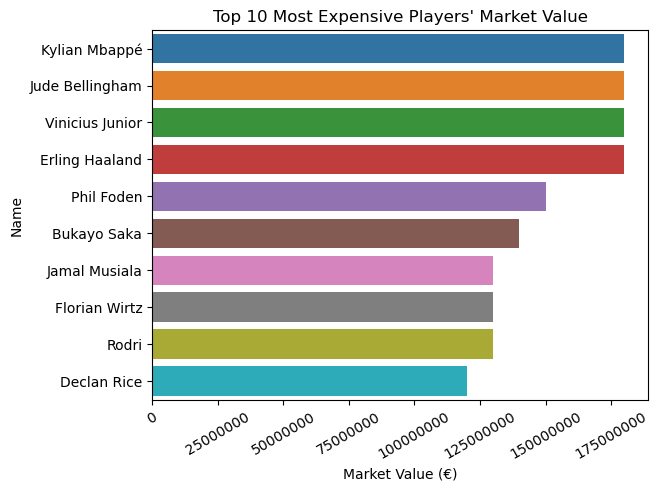

In [29]:
# Filter the DataFrame, sort it by 'market_value_in_eur', and select the top 10 players
sns.barplot(data=full_players_info_2023.sort_values(by='market_value_in_eur', ascending=False).head(10), x='market_value_in_eur', y='name', edgecolor="none")

# Define the format function
def format_func(value, tick_number):
    return f'{value:.0f}'

# Plot the data
pvl = plt.gca()

# Apply the format to x-axis
pvl.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Set the label and titles
plt.xlabel('Market Value (€)')
plt.xticks(rotation=30)
plt.ylabel('Name')
plt.title("Top 10 Most Expensive Players' Market Value")

# Show the plot
plt.show()

From the bar chart above, we can see that :
- The top 10 most expensive players are valued between €120 million and €180 million.
- Kylian Mbappé, Jude Bellingham, Vinicius Junior, and Erling Haaland lead the with the highest market value of €180 million.
- A significant difference exists between the top four players and the rest of the top 10.
- Players like Phil Foden, Bukayo Saka, and others occupy the €120 million to €150 million range.

#### Do players with specific physical attributes command higher market values?

We know that in football, especially in one of the most competitive league in the world like premiere league relies heavily on physical battle between players. Therefore, could it be that the physical attribute of the players like height of the players impact the player's market value? Here, we can see the distribution as follows

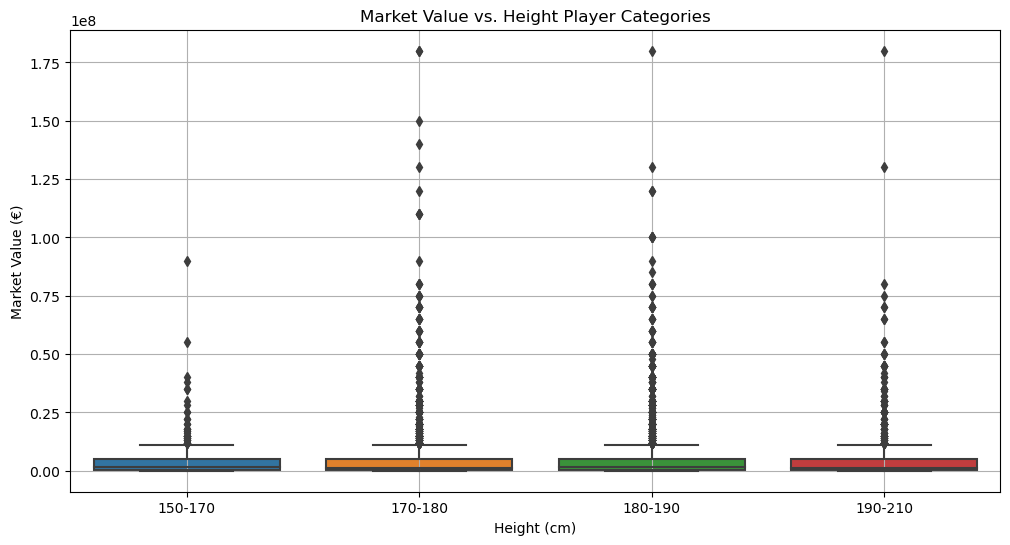

In [30]:
# Create a temporary copy of the DataFrame to avoid modifying the original
df_copy = full_players_info_2023.copy()

# Define height bins and labels
bins_height = [150, 170, 180, 190, 210]
labels_height = ['150-170', '170-180', '180-190', '190-210']

# Create height categories in the copy of the DataFrame
df_copy['height_category'] = pd.cut(df_copy['height_in_cm'], bins=bins_height, labels=labels_height)

# Box plot for market value vs. height categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='height_category', y='market_value_in_eur', data=df_copy)
plt.xlabel('Height (cm)')
plt.ylabel('Market Value (€)')
plt.title('Market Value vs. Height Player Categories')
plt.grid(True)
plt.show()

In [31]:
# Get medians for each height category
medians = df_copy.groupby('height_category')['market_value_in_eur'].median()

# Print the medians with labels
for category, median in zip(labels_height, medians):
  print(f"Median Market Value for {category} cm: {median:.2f} Million €")

Median Market Value for 150-170 cm: 1500000.00 Million €
Median Market Value for 170-180 cm: 1200000.00 Million €
Median Market Value for 180-190 cm: 1500000.00 Million €
Median Market Value for 190-210 cm: 1200000.00 Million €


In [32]:
df_copy.groupby('height_category')['market_value_in_eur'].describe()

,count,mean,std,min,25%,50%,75%,max
height_category,,,,,,,,
150-170,290.0,4.618621e+06,8.831960e+06,50000.0,500000.0,1500000.0,4875000.0,90000000.0
170-180,2379.0,5.785406e+06,1.339562e+07,10000.0,450000.0,1200000.0,5000000.0,180000000.0
180-190,3213.0,5.595285e+06,1.172709e+07,25000.0,500000.0,1500000.0,5000000.0,180000000.0
190-210,802.0,5.765087e+06,1.300885e+07,25000.0,400000.0,1200000.0,5000000.0,180000000.0


From the box plot and descriptive statistics above, we can see that :
- There is no clear correlation between player height and median market value.
- Both tall and short players can have high or low market values, indicating that individual performance and other factors maybe are more influential.
- The presence of outliers suggests that maybe exceptional individual qualities, unrelated to height, significantly impact market value.
- Player performance metrics, such as goals, assists, or overall skill, likely play a more critical role in determining market value.

We can also see if the dominant foot of the players (physical attribute) affect players market price or not

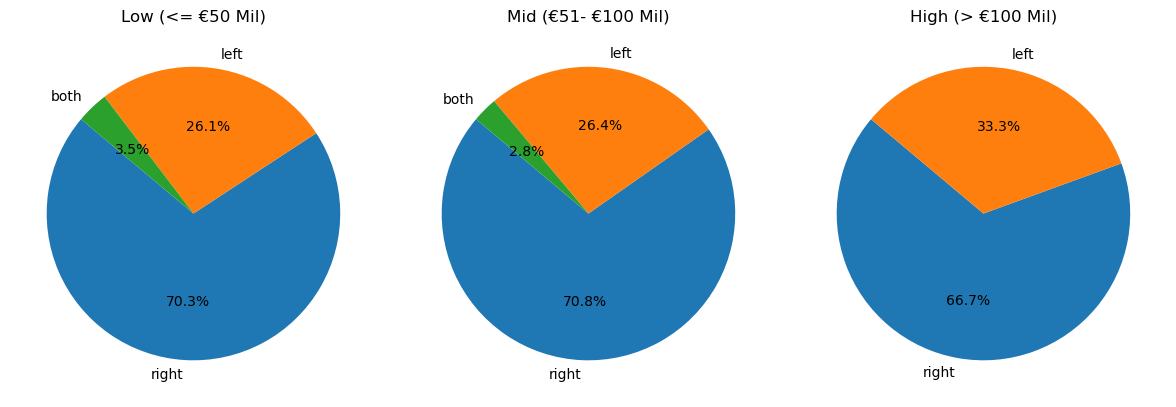

In [33]:
# Define market value ranges
ranges = [
    ('Low (<= €50 Mil)', full_players_info_2023[(full_players_info_2023['market_value_in_eur'] <= 50000000)]['foot'].value_counts()),
    ('Mid (€51- €100 Mil)', full_players_info_2023[(full_players_info_2023['market_value_in_eur'] > 50000000) & (full_players_info_2023['market_value_in_eur'] <= 100000000)]['foot'].value_counts()),
    ('High (> €100 Mil)', full_players_info_2023[full_players_info_2023['market_value_in_eur'] > 100000000]['foot'].value_counts())  
]
# Create subplots and pie charts
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Create a list to store pie chart handles
pie_charts = []
for i, (range_label, data) in enumerate(ranges):
    pie_chart, _, _ = axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    pie_charts.append(pie_chart)  # Append pie chart handles to the list
    axes[i].set_title(range_label)

# Create a legend outside the subplots
plt.tight_layout()
plt.show()

From the pie charts above, we can conclude that :
- Across all market value categories, right-footed players are the majority.
- The distribution of foot preference remains relatively consistent across the low, mid, and high market value groups. So, the physical attribtue (foot) doesn't correlate with the player's value

#### What factors contribute most to a player's market value (age, position, performance metrics)?

Player market value in football is influenced by various factors. Age, position, and performance often impact a player's worth. We will analyze data to determine how these elements contribute to a player's market value.

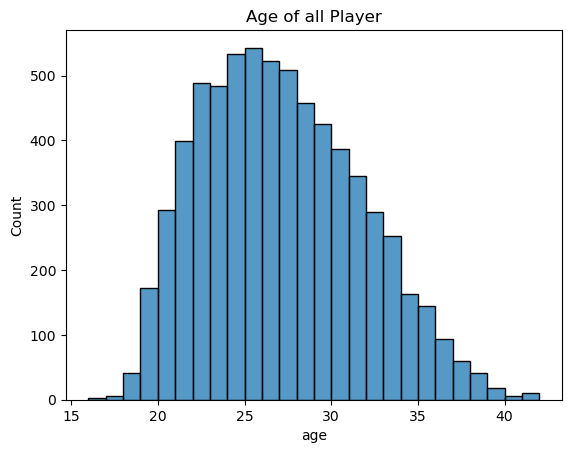

Mean player age :  26.638145100972327
Median player age :  26.0


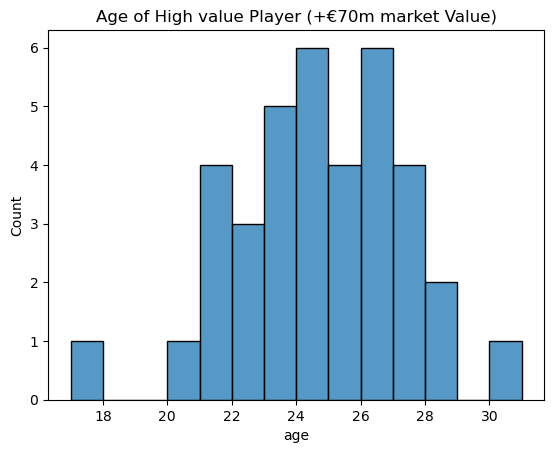

Mean player age (High value) :  24.243243243243242
Median player age (High value) :  24.0


In [34]:
# Histogram plot: Market Value vs Age
plt.title("Age of all Player")
sns.histplot(x='age',data=full_players_info_2023, binwidth=1)
plt.show()

print("Mean player age : ", full_players_info_2023['age'].mean())
print("Median player age : ", full_players_info_2023['age'].median())

High_value_full_players_info_2023 = full_players_info_2023[full_players_info_2023['market_value_in_eur']>70000000]
plt.title("Age of High value Player (+€70m market Value)")
sns.histplot(x='age',data=High_value_full_players_info_2023, binwidth=1)
plt.show()

print("Mean player age (High value) : ", High_value_full_players_info_2023['age'].mean())
print("Median player age (High value) : ", High_value_full_players_info_2023['age'].median())

The histograms provided show the distribution of ages among two groups of football players: all players and high-value players (with market values above €70 million).

- The age distribution of all players resembles a normal distribution, with mean and median around 26, indicating that this is the most common age range for football players.

- The value of mean and median dropped to 24 when we are only looking at highly valued players (+€70m market Value)

Overall,the peak market value for football players tends to coincide with the ages 24-26, where players are typically in their prime physically and professionally. Younger players, particularly those in their early to mid-20s, are more likely to have higher market values, likely due to their potential for development and longer future careers.

In [35]:
# We can also see the descriptive stats for column age as follows :
age_series = full_players_info_2023['age']

# Basic descriptive statistics
age_stats = age_series.describe()

# Additional statistics
variance = age_series.var()
skewness = age_series.skew()
kurtosis = age_series.kurtosis()
mode = age_series.mode().iloc[0]  # Get the first mode
iqr = age_series.quantile(0.75) - age_series.quantile(0.25)

# Creating a DataFrame for all statistics
additional_stats = pd.DataFrame({
    'count': [age_stats['count']],
    'mean': [age_stats['mean']],
    'std': [age_stats['std']],
    'min': [age_stats['min']],
    'median': [age_stats['50%']],
    'max': [age_stats['max']],
    'variance': [variance],
    'skewness': [skewness],
    'kurtosis': [kurtosis],
    'mode': [mode],
    'IQR': [iqr]
})

additional_stats

,count,mean,std,min,median,max,variance,skewness,kurtosis,mode,IQR
0,6685.0,26.638145,4.563005,16.0,26.0,42.0,20.821016,0.374894,-0.460321,25,7.0


From the output above, we can see that age of the football players is distributed normally, there are no significance difference between mean, median, and mode, also close to zero of skewness and kurtosis, showing that age of the players is normally distributed

We can also check the impact of player's position with market value using inferential statistics test with ANOVA as follows :

First, we will define the hypothesis

`Null Hypothesis (H0)` : There are no statistically significant differences in the mean market values of players across different positions. In other words, the position a player plays does not affect their market value.

`Alternative Hypothesis (H1)` : At least one of the mean market values differs significantly among the different positions. This implies that the position a player plays does have an effect on their market value.

We then use the confidence level of 95%

In [36]:
# Performing ANOVA
positions = full_players_info_2023['position'].unique()
market_values = [full_players_info_2023[full_players_info_2023['position'] == position]['market_value_in_eur'] for position in positions]

anova_result = stats.f_oneway(*market_values)

print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA p-value: {anova_result.pvalue}")

ANOVA F-statistic: 13.607304797484575
ANOVA p-value: 7.568120790390212e-09


**Conclusion on ANOVA Results for Player Positions and Market Value**

The ANOVA analysis conducted to examine the relationship between player positions and market values has yielded significant findings.

- The low p-value is far below the commonly accepted significance threshold of 0.05. This extremely low p-value allows us to **confidently reject the null hypothesis**, which means that **the position a player plays does have an effect on their market value**.

- For instance, strikers and attacking midfielders might command higher market values due to their direct influence on scoring, while positions like goalkeepers and defenders, although crucial, might not always receive the same market valuation.

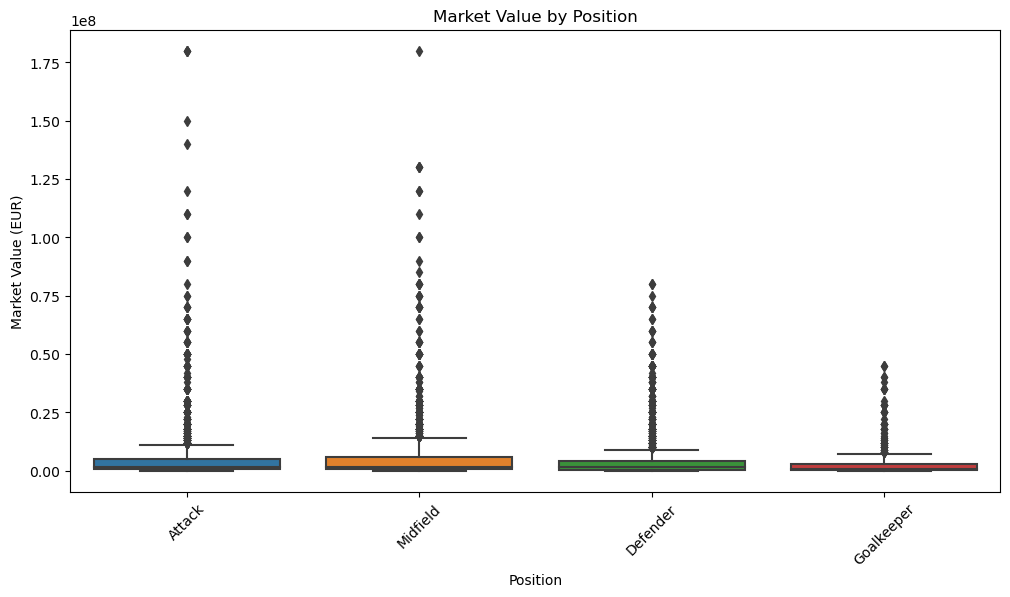

In [37]:
# Box plot: Market Value by Position
plt.figure(figsize=(12, 6))
sns.boxplot(x='position', y='market_value_in_eur', data=full_players_info_2023)
plt.title('Market Value by Position')
plt.xlabel('Position')
plt.ylabel('Market Value (EUR)')
plt.xticks(rotation=45)
plt.show()

The box plot illustrates the distribution of market values across different player positions: Attack, Midfield, Defender, and Goalkeeper.

- Attackers generally have the highest market values among the positions, as indicated by the higher median and the range of values. This suggests that attacking players are often more highly valued, possibly due to their direct impact on scoring goals and their marketability.

- Midfielders also have relatively high market values, though slightly lower than attackers. This position can encompass a variety of roles, from defensive to attacking midfielders, which may affect the market value distribution.

- Defenders show a lower median market value compared to attackers and midfielders. However, there are still outliers with very high market values, likely representing elite players in this position.

- Goalkeepers generally have the lowest market values among the four positions, reflected by the lower median and the narrower range. Despite this, there are still a few goalkeepers with very high market values, indicating that exceptional talent in this position is highly valued.

Overall, the plot underscores the fact that player position plays a significant role in determining market value, with attackers generally commanding higher prices. However, elite players in any position can still achieve high market values due to factors such as skill level, demand, and marketability.

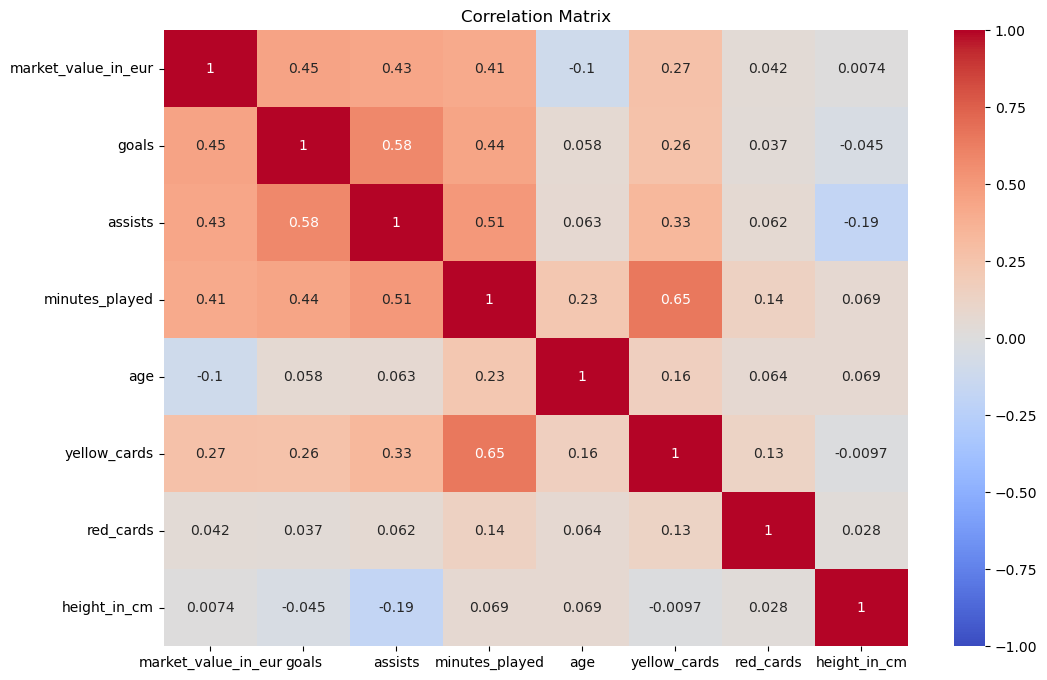

In [38]:
# Heatmap: Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = full_players_info_2023[['market_value_in_eur', 'goals', 'assists', 'minutes_played', 'age', 'yellow_cards', 'red_cards', 'height_in_cm']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows the relationships between different variables related to football players, including market value, goals, assists, minutes played, age. From the correlation matrix, we can conclude that :

1. Market Value Correlations:

- **Goals (0.45) and Assists (0.43)**: There is a moderate positive correlation between market value and both goals and assists. This indicates that players who score more goals and provide more assists tend to have higher market values.

- **Minutes Played (0.41)**: There is also a moderate positive correlation between market value and minutes played, suggesting that more playing time is associated with higher market value, potentially due to greater exposure and performance consistency.

- **Age (-0.1)**: There is a slight negative correlation between market value and age, indicating that as players get older, their market value may decrease. This could be due to factors like decreased physical capabilities or reduced future potential.

2. Interrelationships Among Performance Metrics:

- **Goals and Assists (0.58)**: A strong positive correlation between goals and assists suggests that players who score frequently also tend to assist more, likely reflecting overall offensive contributions.

- **Goals and Minutes Played (0.44) and Assists and Minutes Played (0.51)**: These moderate positive correlations indicate that players who are on the field more often tend to have more goals and assists, highlighting the importance of playing time in accumulating statistics.

#### Where are the players with the highest market values from (country)?

The global football transfer market is characterized by significant variations in player valuations. This analysis seeks to identify the countries that consistently produce players commanding the highest market values.

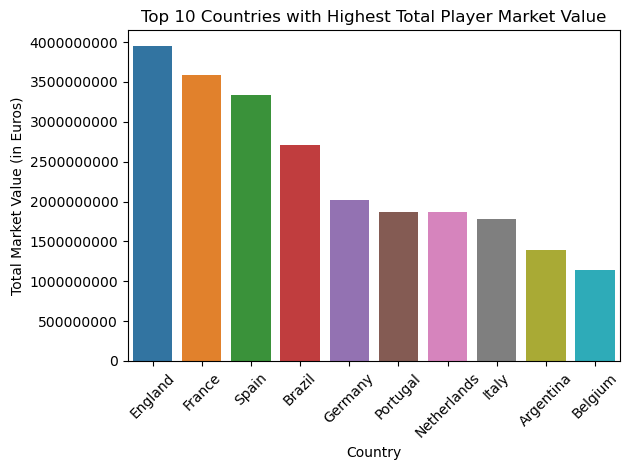

In [39]:
# Group by country and calculate the sum of market values
country_market_value = full_players_info_2023.groupby('country_of_citizenship')['market_value_in_eur'].sum().sort_values(ascending=False)

# Select top 10 countries
top_10_countries = country_market_value.head(10)

# Create a bar chart with seaborn
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)

# Define the format function to display integer market values (no decimals)
def format_func(value, tick_number):
    return f'{value:.0f}'

# Get the current axis object
ax = plt.gca()

# Apply the format function to the y-axis (total market value)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Customize the plot with labels and title
plt.xlabel('Country')
plt.ylabel('Total Market Value (in Euros)')
plt.xticks(rotation=45)
plt.title('Top 10 Countries with Highest Total Player Market Value')
plt.tight_layout()  # Adjust spacing between elements for better readability

# Show the plot
plt.show()

From the chart above, we can see that :
- England has the highest total player market value by a significant margin, indicating a strong domestic league and high demand for English players.
- European countries (England, France, Spain, Germany, Italy, Portugal, Netherlands) occupy the top positions, suggesting a concentration of footballing talent and financial resources in Europe.
- There's a considerable difference in market value between England and the lower-ranked countries, indicating a potential disparity in player development or league competitiveness.

#### Why do some players have a higher market value despite similar performance metrics (goals, assists, minutes played)?

The market value of football players is influenced by a combination of factors beyond just performance metrics like goals, assists, and minutes played. This is an example of the proof of it

<Figure size 1000x600 with 0 Axes>

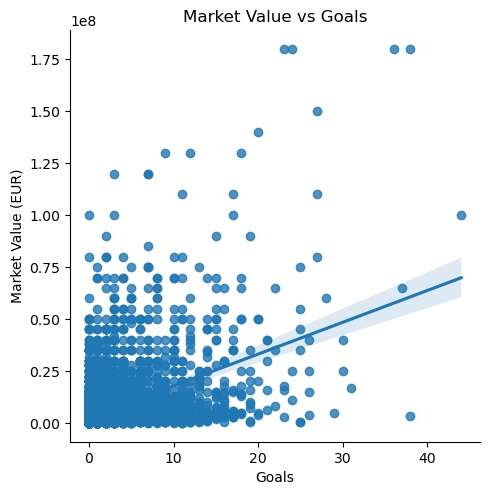

<Figure size 1000x600 with 0 Axes>

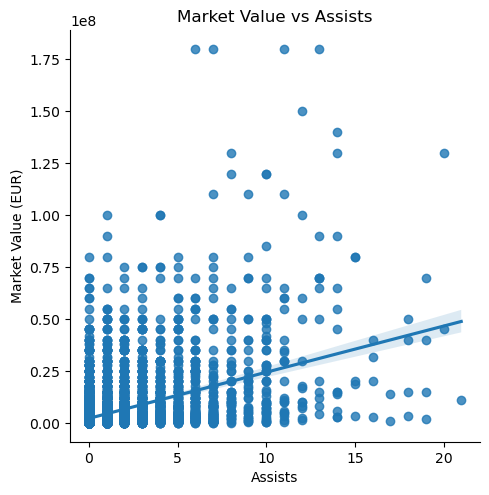

<Figure size 1000x600 with 0 Axes>

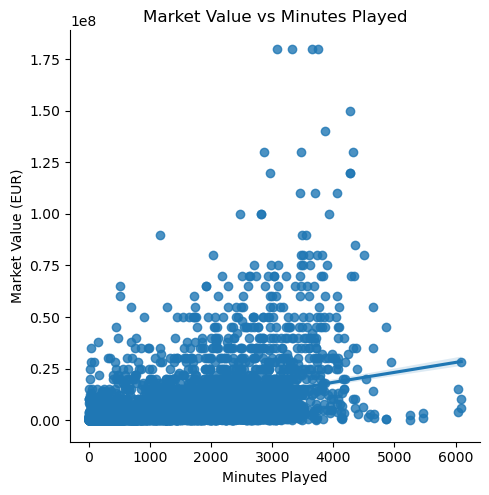

In [40]:
# Scatter plot: Market Value vs Goals
plt.figure(figsize=(10, 6))
sns.lmplot(x='goals', y='market_value_in_eur', data=full_players_info_2023)
plt.title('Market Value vs Goals')
plt.xlabel('Goals')
plt.ylabel('Market Value (EUR)')
plt.show()

# Scatter plot: Market Value vs Assists
plt.figure(figsize=(10, 6))
sns.lmplot(x='assists', y='market_value_in_eur', data=full_players_info_2023)
plt.title('Market Value vs Assists')
plt.xlabel('Assists')
plt.ylabel('Market Value (EUR)')
plt.show()

# Scatter plot: Market Value vs Minutes Played
plt.figure(figsize=(10, 6))
sns.lmplot(x='minutes_played', y='market_value_in_eur', data=full_players_info_2023)
plt.title('Market Value vs Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Market Value (EUR)')
plt.show()

From these plot between player performance metrics and market value, we can conclude that :

- **Weak Correlation**: There appears to be a weak correlation between performance metrics (goals, assists, and minutes played) and the market value. For example, players with a higher market value are spread across a range of goals scored, indicating that the number of goals alone is not a strong predictor of market value.

- **High Market Value Outliers**: There are several players with high market values who have scored relatively few goals. This suggests that factors other than goals contribute significantly to a player's market value.

- **Cluster at Low Goals, Assists, Minutes Played and Low Market Value**: There is a dense cluster of players who have both low market values and few goals scored, assists, and minutes played. This is expected, for example, as players who score fewer goals are generally valued lower in the market.

- **High Performance Metrics with Variable Market Value**: Players who score many goals (e.g., above 20 goals) have variable market values. Some have high market values, while others have relatively moderate values. This further supports the idea that goals are not the only determinant of market value.

### - League

#### Which league contribute to highest market value right now?

The top 5 football leagues, often referred to as the "Big Five," are:  
English Premier League (EPL) - England  
La Liga - Spain  
Serie A - Italy  
Bundesliga - Germany  
Ligue 1 - France  

These leagues are considered the most competitive and popular in European and global football, attracting top players and generating significant revenue. But do they really contribute to highest market value right now? 

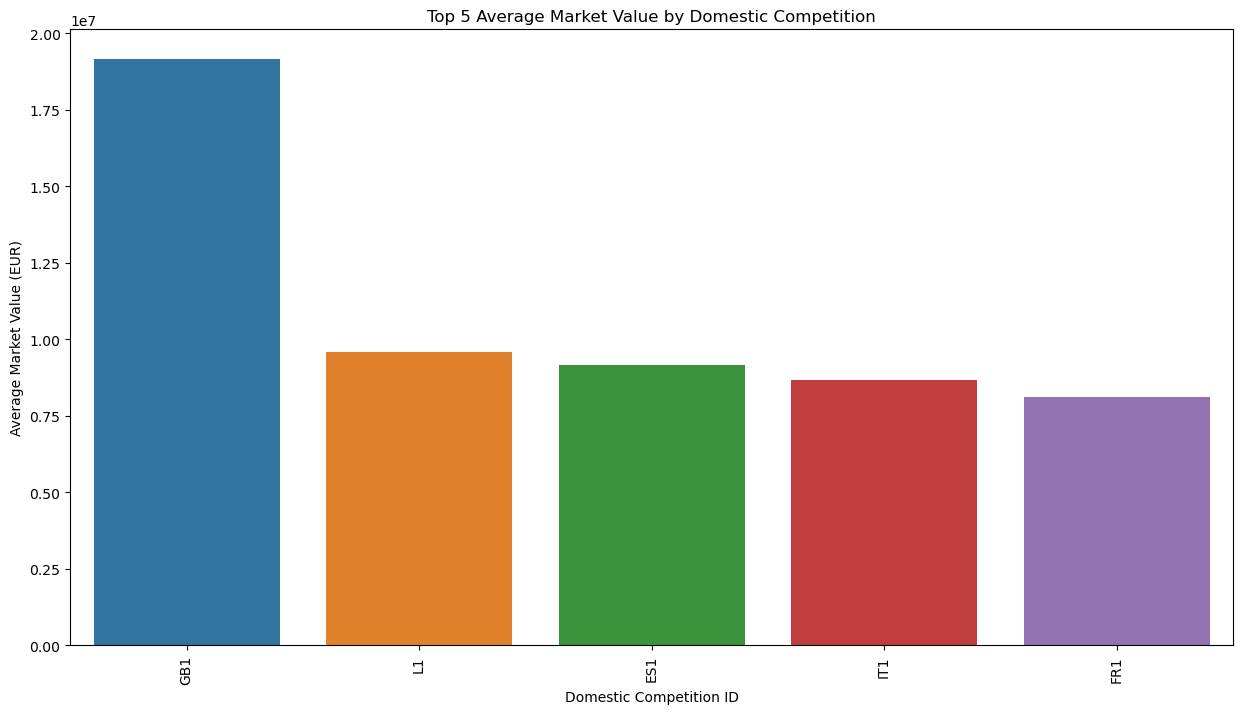

In [41]:
# Bar plot: Market Value by League
plt.figure(figsize=(15, 8))
avg_market_value_by_competition = full_players_info_2023.groupby('current_club_domestic_competition_id')['market_value_in_eur'].mean().sort_values(ascending=False).head(5)
sns.barplot(x=avg_market_value_by_competition.index, y=avg_market_value_by_competition.values)
plt.title('Top 5 Average Market Value by Domestic Competition')
plt.xlabel('Domestic Competition ID')
plt.ylabel('Average Market Value (EUR)')
plt.xticks(rotation=90)
plt.show()


The bar chart illustrates the average market value of players across the top five domestic competitions, identified by their competition IDs: GB1 (England), L1 (Germany), ES1 (Spain), IT1 (Italy), and FR1 (France).

- **Highest Average Market Value**: The GB1 competition, representing the English Premier League, has the highest average market value among the five competitions. This suggests that players in this league are generally valued higher compared to those in other leagues.

- **Competitive Valuations**: The other four competitions—L1, ES1, IT1, and FR1—have similar average market values, though they are notably lower than GB1. This indicates a relatively balanced market valuation among these leagues but still highlights a gap compared to GB1.

- **Influence of League Prestige**: The significant lead in average market value for GB1 could be attributed to factors such as the league's global popularity, high revenue, strong media coverage, and the presence of numerous high-profile players and clubs. These factors can drive up the market values of players in this competition.

- **Market Dynamics**: The chart underscores the impact of league-specific dynamics on player market values. The differences suggest that players' market values are influenced not only by individual performance but also by the prestige and financial strength of the leagues in which they play.

Overall, these findings shows that the league a player participates in can have a substantial effect on their market value, with the English Premier League (GB1) leading in terms of player valuation.

### - Club

#### Which club has the highest market value right now?

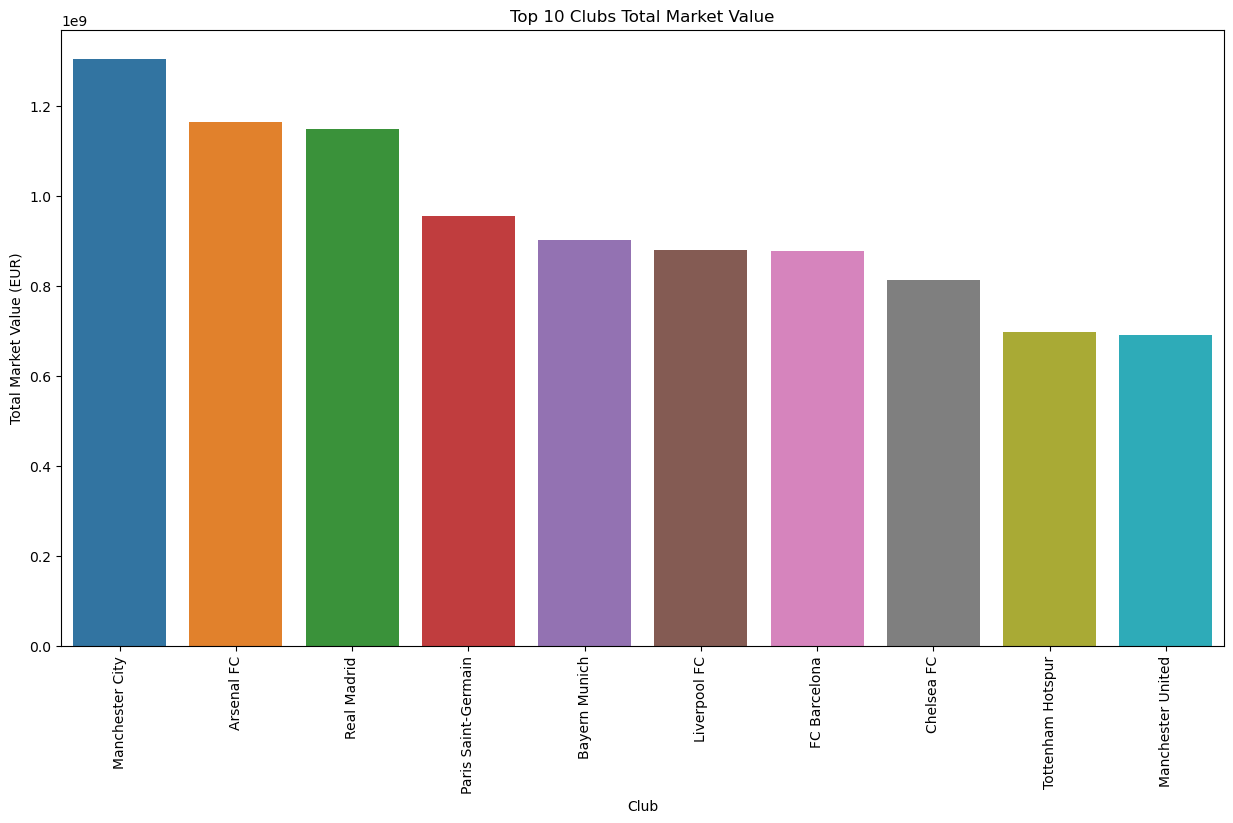

In [45]:
plt.figure(figsize=(15, 8))
club_value = full_players_info_2023.groupby('current_club_name')['market_value_in_eur'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=club_value.index, y=club_value.values)
plt.title('Top 10 Clubs Total Market Value')
plt.xlabel('Club')
plt.ylabel('Total Market Value (EUR)')
plt.xticks(rotation=90)
plt.show()

In [43]:
club_value.describe()

count    1.000000e+01
mean     9.426700e+08
std      2.031920e+08
min      6.895000e+08
25%      8.295000e+08
50%      8.901500e+08
75%      1.099525e+09
max      1.303300e+09
Name: market_value_in_eur, dtype: float64

The data and the visualization provide several insights into the market values of the top football clubs:

- **Top Club**: Manchester City remains the club with the highest total market value, approximately €1.3 billion, significantly higher than the others. Followed by Arsenal FC and Real Madrid

- **Average Market Value**: The average market value among the top 10 clubs is approximately €942.7 million. This indicates that top clubs generally have a very high market valuation.

- **Value Distribution**: The standard deviation of approximately €203.2 million reflects the variation in market values among these clubs. While there is a substantial spread, most clubs' values are relatively close to the average.

- **Interquartile Range (IQR)**: The IQR, from about €829.5 million to €1.1 billion, shows that the middle 50% of the clubs' market values are concentrated within this range, indicating that most top clubs have market values near the billion-euro mark.

- **Range of Values**: The market values range from approximately €689.5 million (Manchester United) to €1.303 billion (Manchester City). This range demonstrates the significant financial differences even among the top clubs.

- **Market Value Gap**s: The considerable gap between the highest and lowest market values in this group reflects the varying financial strengths and squad valuations across top European clubs.

Overall, the data shows that the top football clubs have extremely high market values, with a few clubs, such as Manchester City, standing out due to their particularly high valuations. This reflects both the financial investments in players and the global market appeal of these clubs.

## Conclusion

With the goal to increase the overall market value of players by 15% within the upcoming year by analyzing and optimizing player performance metrics and market value determinants. There are couple of insight we can use as our conclusion after doing the analysis on our data :

- Kylian Mbappé, Jude Bellingham, Vinicius Junior, and Erling Haaland lead the with the highest market value of €180 million. The top 10 most expensive players are valued between €120 million and €180 million.

- Specific physical attributes of the player (height and dominant foot) **doesn't affect directly** player's market value.

- **Age of the players contributes to the market price of the players**, high valued player tends to be at around eary to mid-20s, likely **due to their potential for development, thus making them more valued than older player**.

- **Performance metrics like (Goals, Assists, and Minutes Played) of the player has moderate positive correlation with player's market value**. Thus, the more goals, assists, and minutes played of the players, indicate the higher the market values of the players

- England has the highest total player market value by significant margin. **European country tends to occupy the top position in terms of producing high valued players**.

- Even though performance metrics contributes to the market price of the players, **it still appear to be a weak correlation between the two**. There are several players with high market values who are highly valued but doesn't have high performance metrics stats (goals, assits, minutes played). **This supports the idea that the stats are not the only determinant of market value**.

-  **The league a player participates in can have a substantial effect on their market value**, with the English Premier League (GB1) leading in terms of player valuation. This means that the tougher the opponent is, the more valued the players are (i.e : Players who played in English Premier League tends to be viewed as highly competitive player, thus, making them more valued)

- **Player position plays a significant role in determining market value, with attackers and midfielders generally commanding higher prices**. For instance, strikers and attacking midfielders might command higher market values due to their direct influence on scoring, while positions like goalkeepers and defenders, although crucial, might not always receive the same market valuation.

- The average market value among the top 10 clubs is approximately €942.7 million. This indicates **that top clubs generally have a very high market valuation**.


**What to do for the club** :

First, focus on developing younger players, particularly those in their early to mid-20s, who demonstrate high potential for growth and development. This aligns with the finding that younger players tend to command higher market values. 

Additionally, emphasize enhancing key performance metrics such as goals, assists, and minutes played, as these have a moderate positive correlation with market value. Investing in training and conditioning programs tailored to improve these metrics could significantly boost player valuation. 

Furthermore, consider the strategic acquisition of players from or to the English Premier League, as participation in this highly competitive league is associated with higher market values. It's also crucial to prioritize positions like attackers and midfielders, which generally command higher prices, while exploring ways to increase the visibility and valuation of players in less highlighted positions like goalkeepers and defenders.

Finally, the club should strengthen its scouting network to identify and acquire talent from regions and clubs that consistently produce high-value players, particularly in Europe. By implementing these strategies, the club can effectively enhance its overall market value, thereby supporting financial recovery and growth.